# Syntetisk

In [1]:
import zipfile as zf
files = zf.ZipFile("/home/jupyter/SyntheticNAV/dsData.zip", 'r')
files.extractall('/home/jupyter/SyntheticNAV/Data')
files.close()

In [2]:
import pandas as pd
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

In [3]:
class DataSynthesizer:
    def __init__(self, input_data, description_file, synthetic_data, mode,
                 threshold_value=20, num_tuples_to_generate=32561):
        self.input_data = input_data
        self.description_file = description_file
        self.synthetic_data = synthetic_data
        self.mode = mode
        self.threshold_value = threshold_value
        self.num_tuples_to_generate = num_tuples_to_generate
        
    def random_data_describer(self):
        describer = DataDescriber(category_threshold=self.threshold_value)
        describer.describe_dataset_in_random_mode(self.input_data)
        describer.save_dataset_description_to_file(self.description_file)
    
    def generate_synthetic_data(self):
        generator = DataGenerator()
        generator.generate_dataset_in_random_mode(self.num_tuples_to_generate, self.description_file)
        generator.save_synthetic_data(self.synthetic_data)
        
    def independent_data_describer(self, categorical_attributes, candidate_keys):
        describer = DataDescriber(category_threshold=self.threshold_value)
        describer.describe_dataset_in_independent_attribute_mode(dataset_file=self.input_data,
                                                         attribute_to_is_categorical=categorical_attributes,
                                                         attribute_to_is_candidate_key=candidate_keys)
        describer.save_dataset_description_to_file(self.description_file)
    
    
    def correlated_data_describer(self, categorical_attributes, candidate_keys, epsilon, degree_of_bayesian_network):
        describer = DataDescriber(category_threshold=self.threshold_value)
        describer.describe_dataset_in_correlated_attribute_mode(dataset_file=self.input_data, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys)
        describer.save_dataset_description_to_file(self.description_file)
        
    def plot_comparision(self):
        input_df = pd.read_csv(self.input_data, skipinitialspace=True)
        synthetic_df = pd.read_csv(self.synthetic_data)
        attribute_description = read_json_file(self.description_file)['attribute_description']
        inspector = ModelInspector(input_df, synthetic_df, attribute_description)
        for attribute in synthetic_df.columns:
            inspector.compare_histograms(attribute)
        inspector.mutual_information_heatmap()


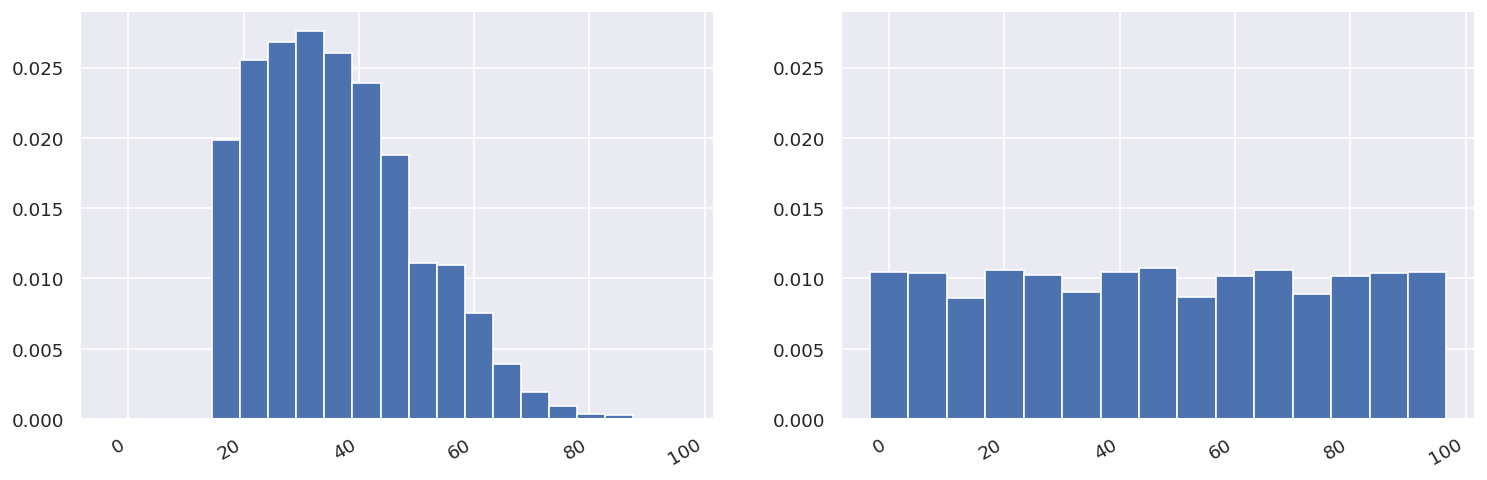

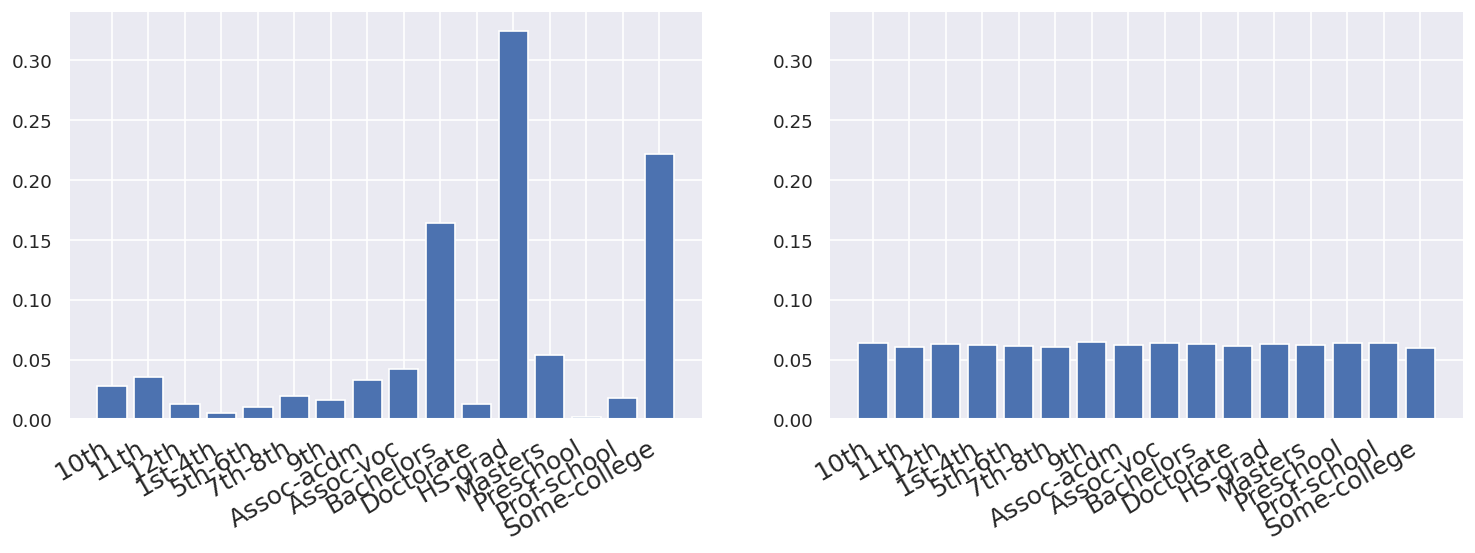

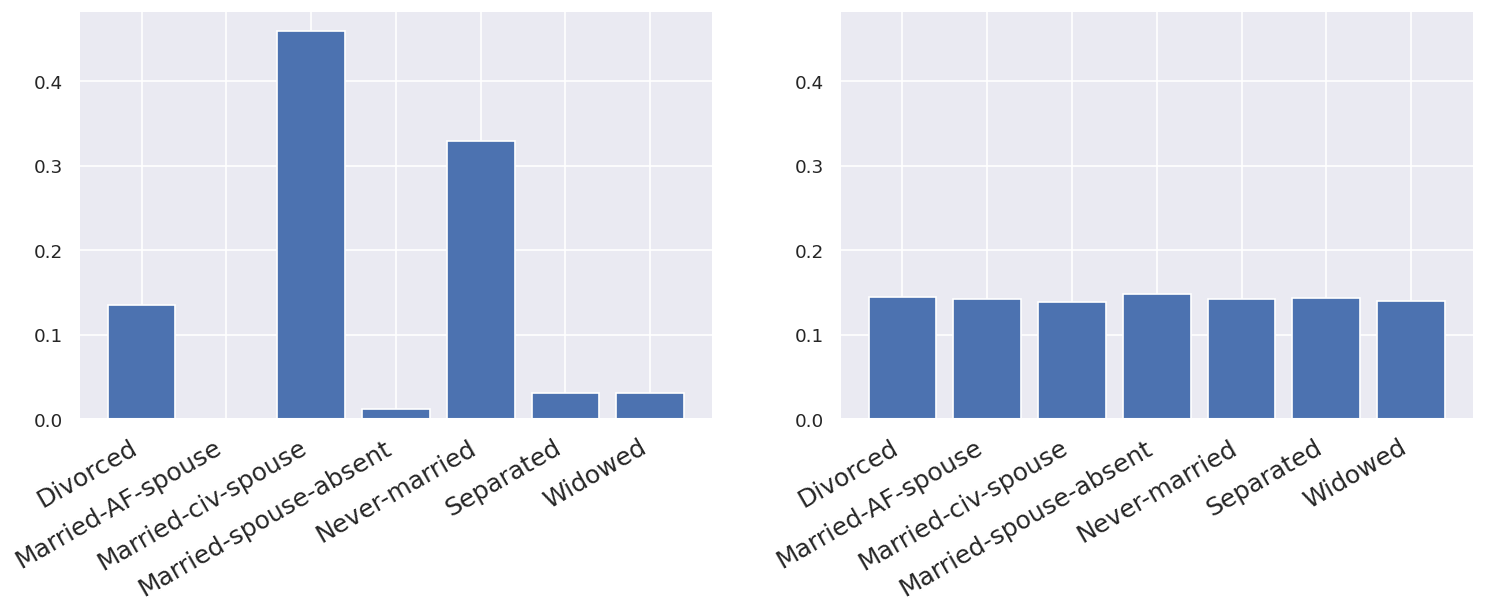

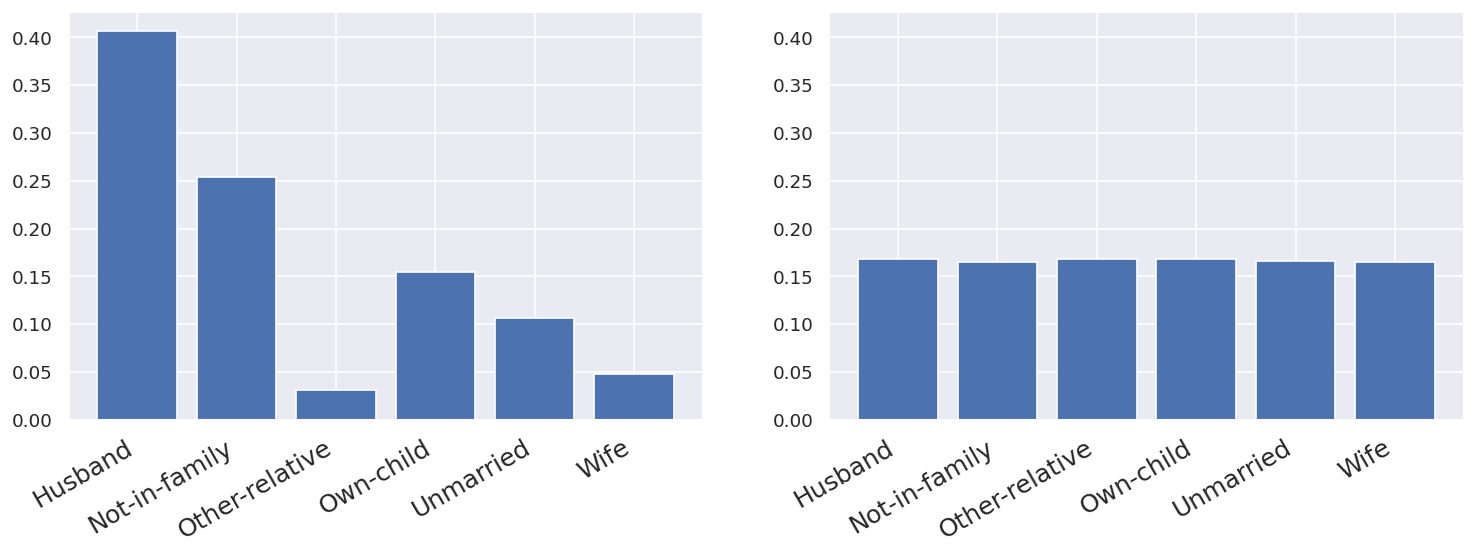

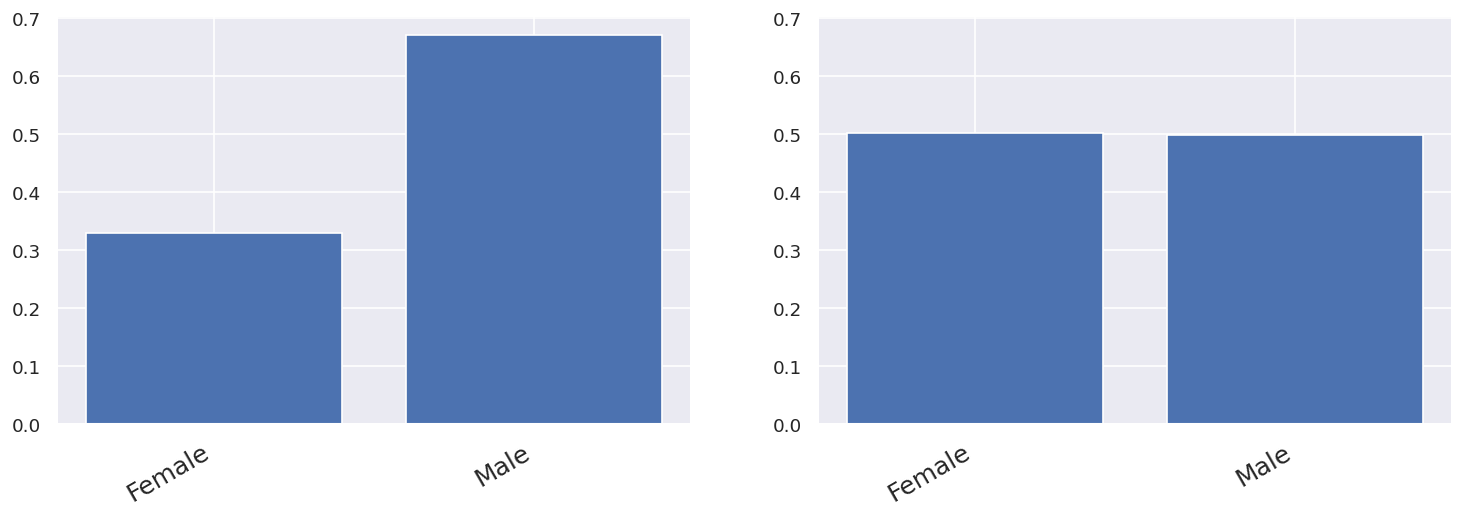

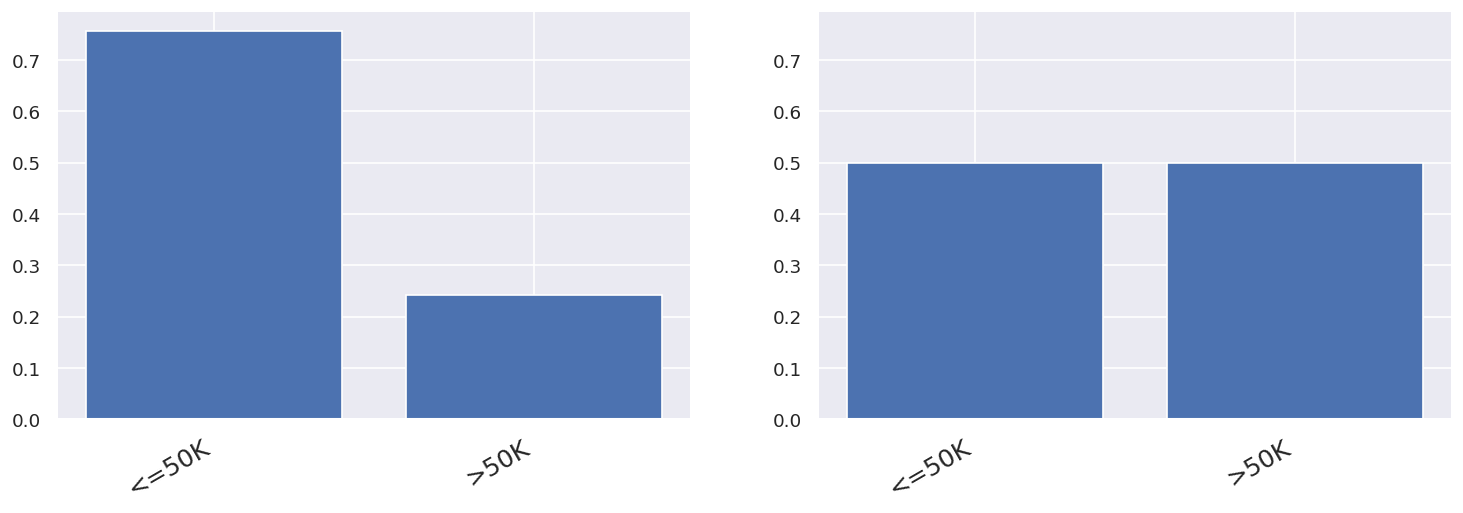

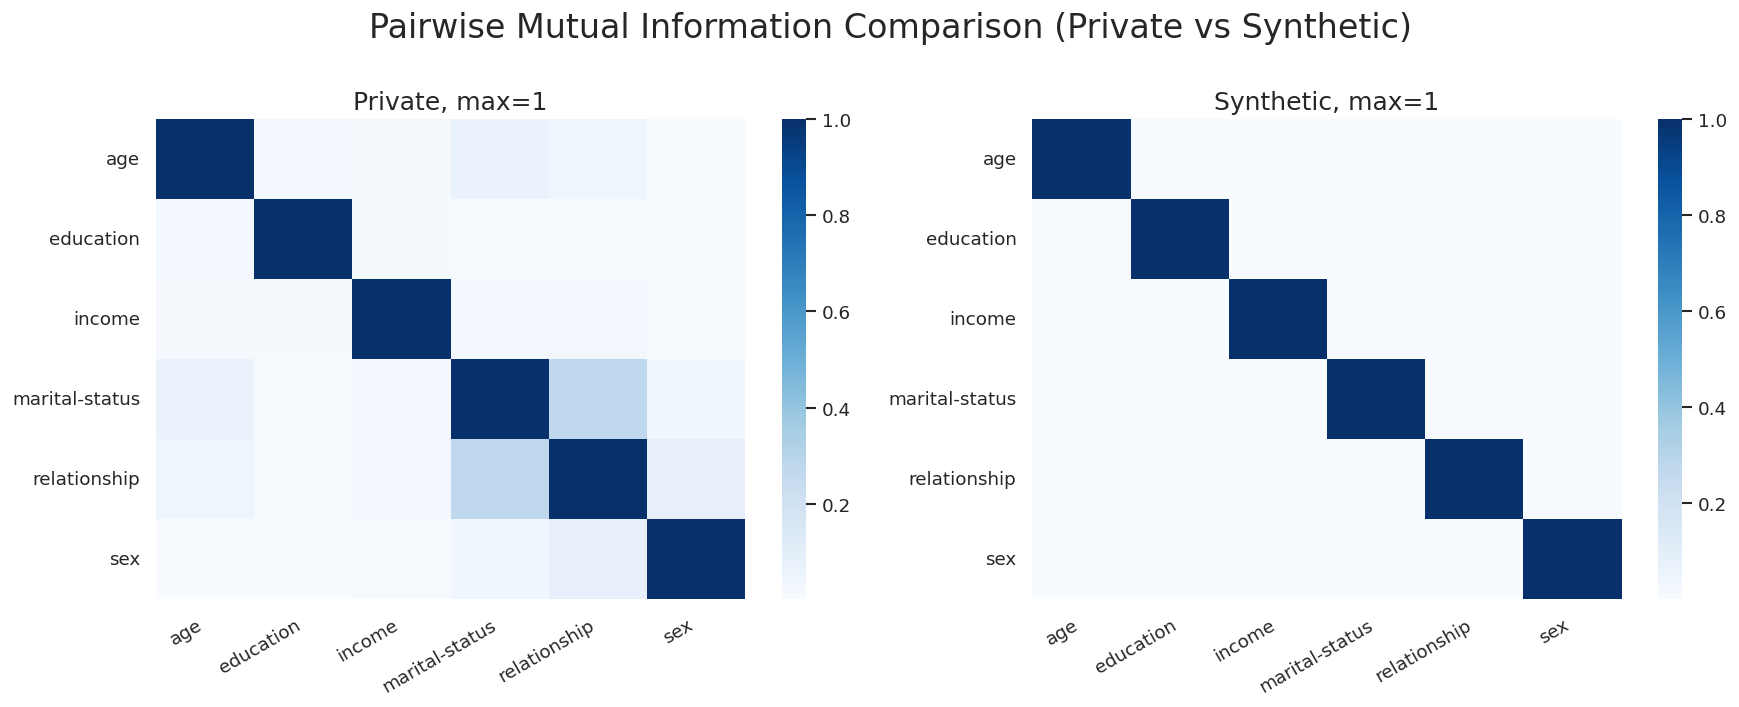

In [10]:
random_synthesizer = DataSynthesizer(input_data='/home/jupyter/SyntheticNAV/Data/data/adult_ssn.csv', 
                                 description_file='/home/jupyter/SyntheticNAV/Data/out/random_mode/description.json', 
                                 synthetic_data='/home/jupyter/SyntheticNAV/Data/out/random_mode/sythetic_data.csv', 
                                 mode='random_mode')
random_synthesizer.random_data_describer()
random_synthesizer.generate_synthetic_data()
random_synthesizer.plot_comparision()

In [19]:
independent_synthesizer = DataSynthesizer(input_data='/home/jupyter/SyntheticNAV/Data/data/adult_ssn.csv', 
                                 description_file='/home/jupyter/SyntheticNAV/Data/out/independent_attribute_mode/description.json', 
                                 synthetic_data='/home/jupyter/SyntheticNAV/Data/out/independent_attribute_mode/sythetic_data.csv', 
                                     mode='independent_mode')

categorical_attributes = {'education': True}
candidate_keys = {'age': False}

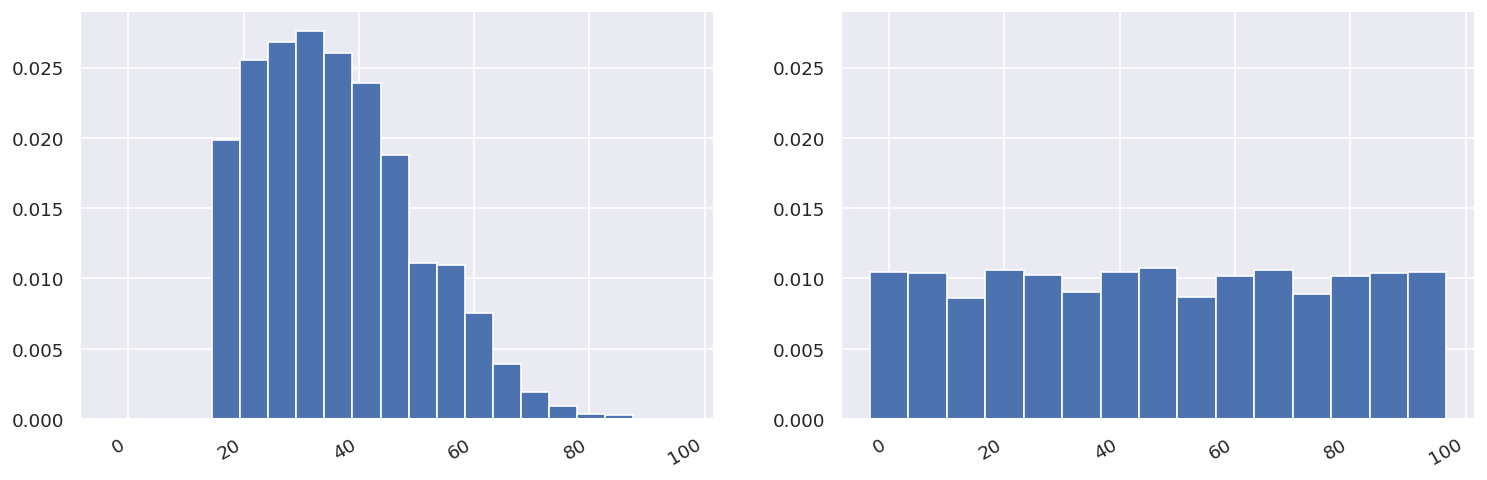

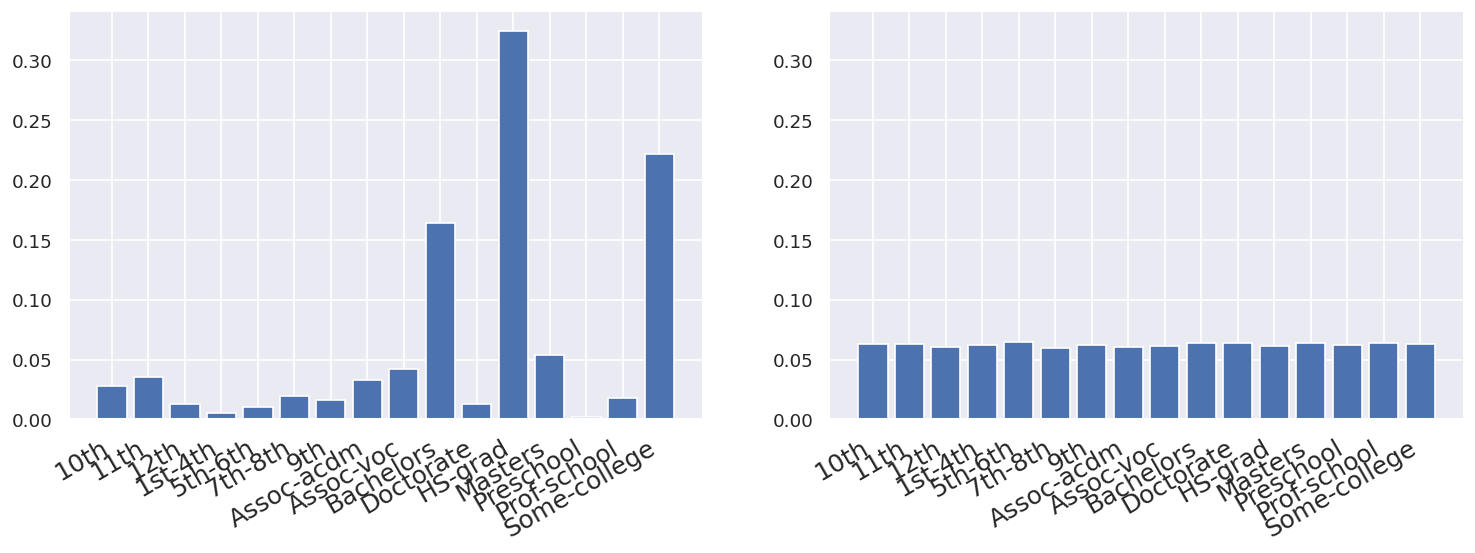

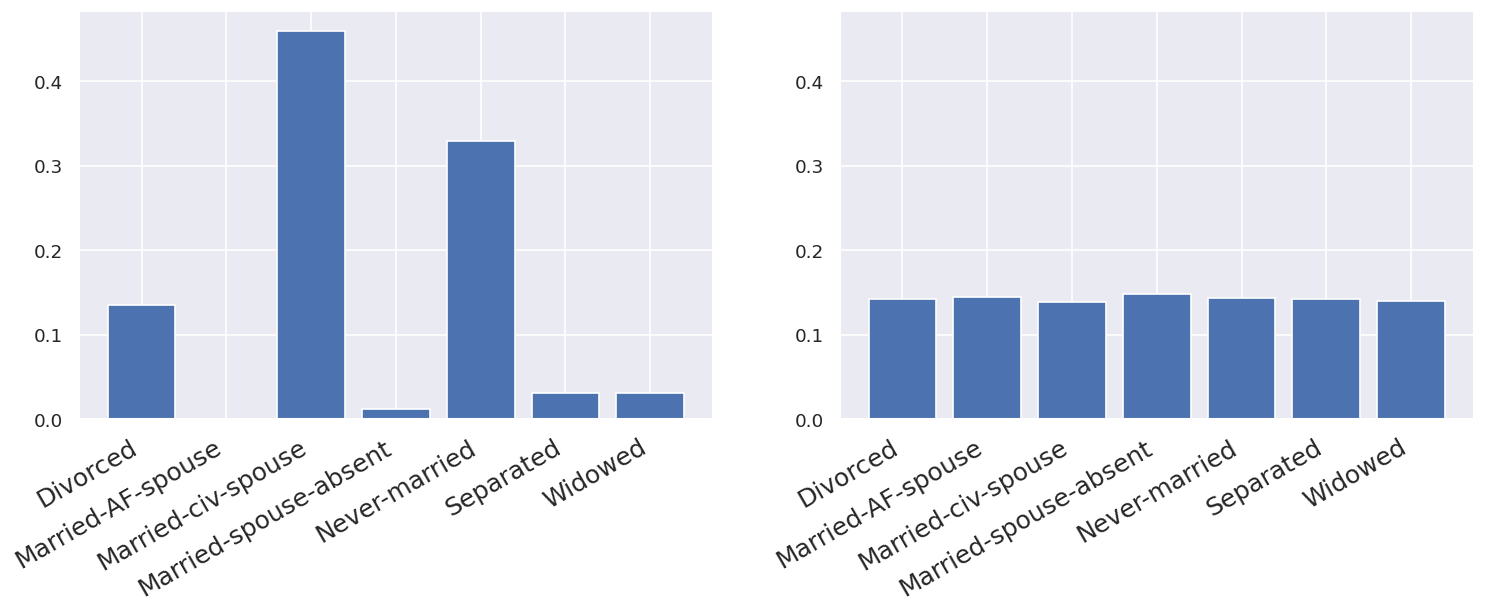

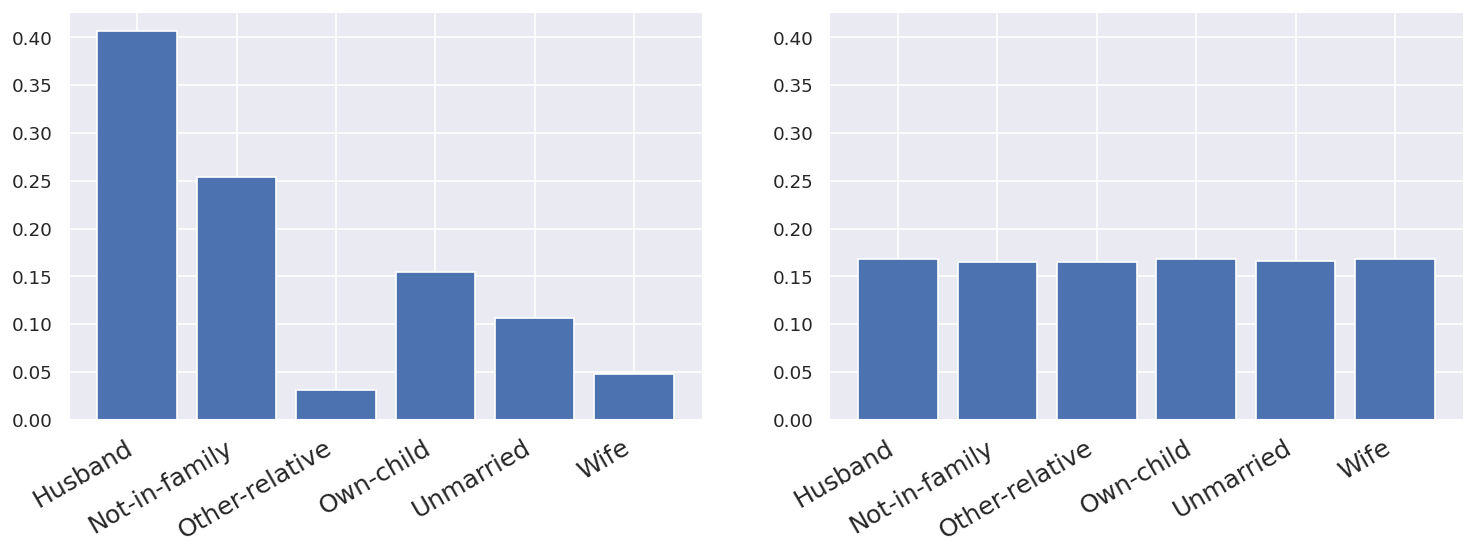

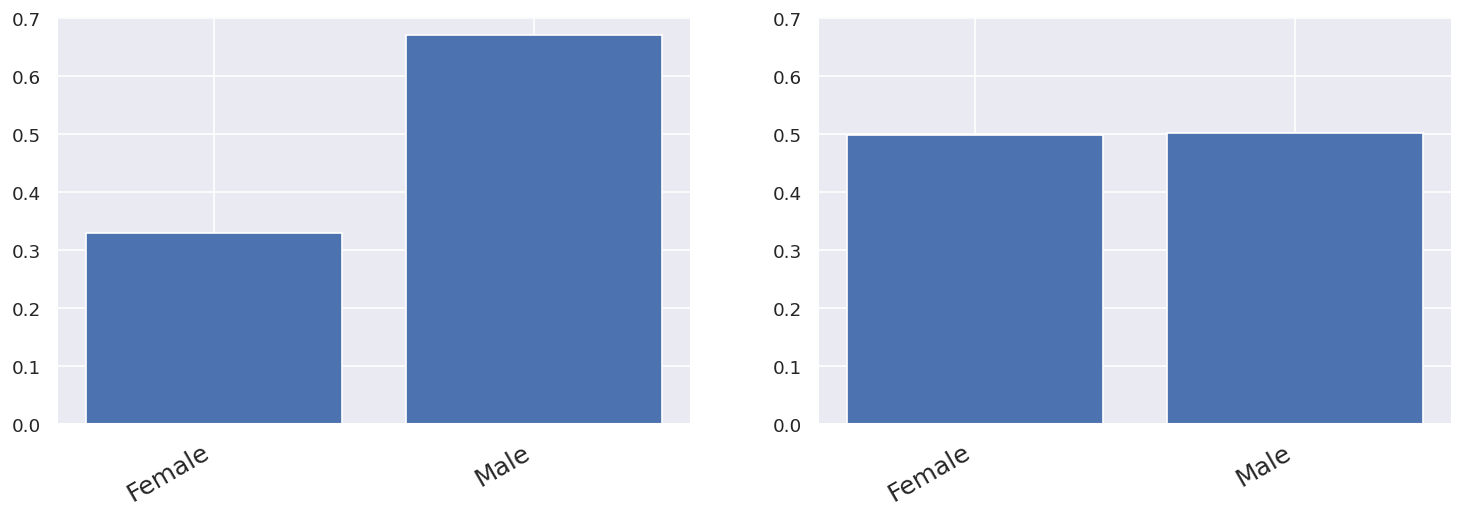

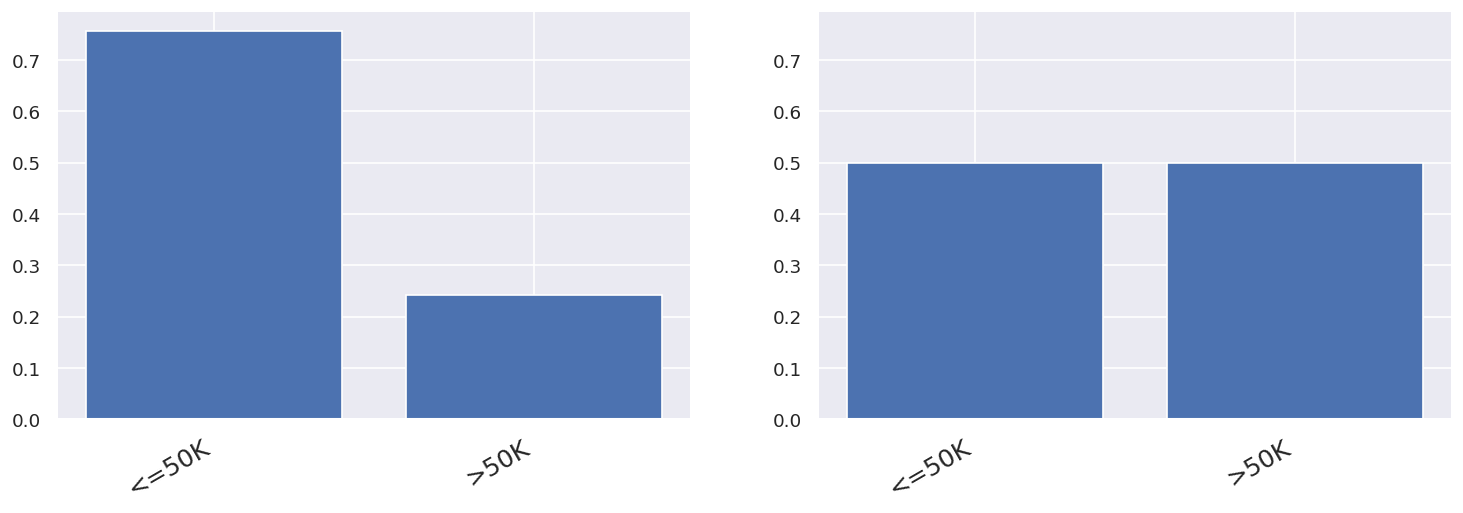

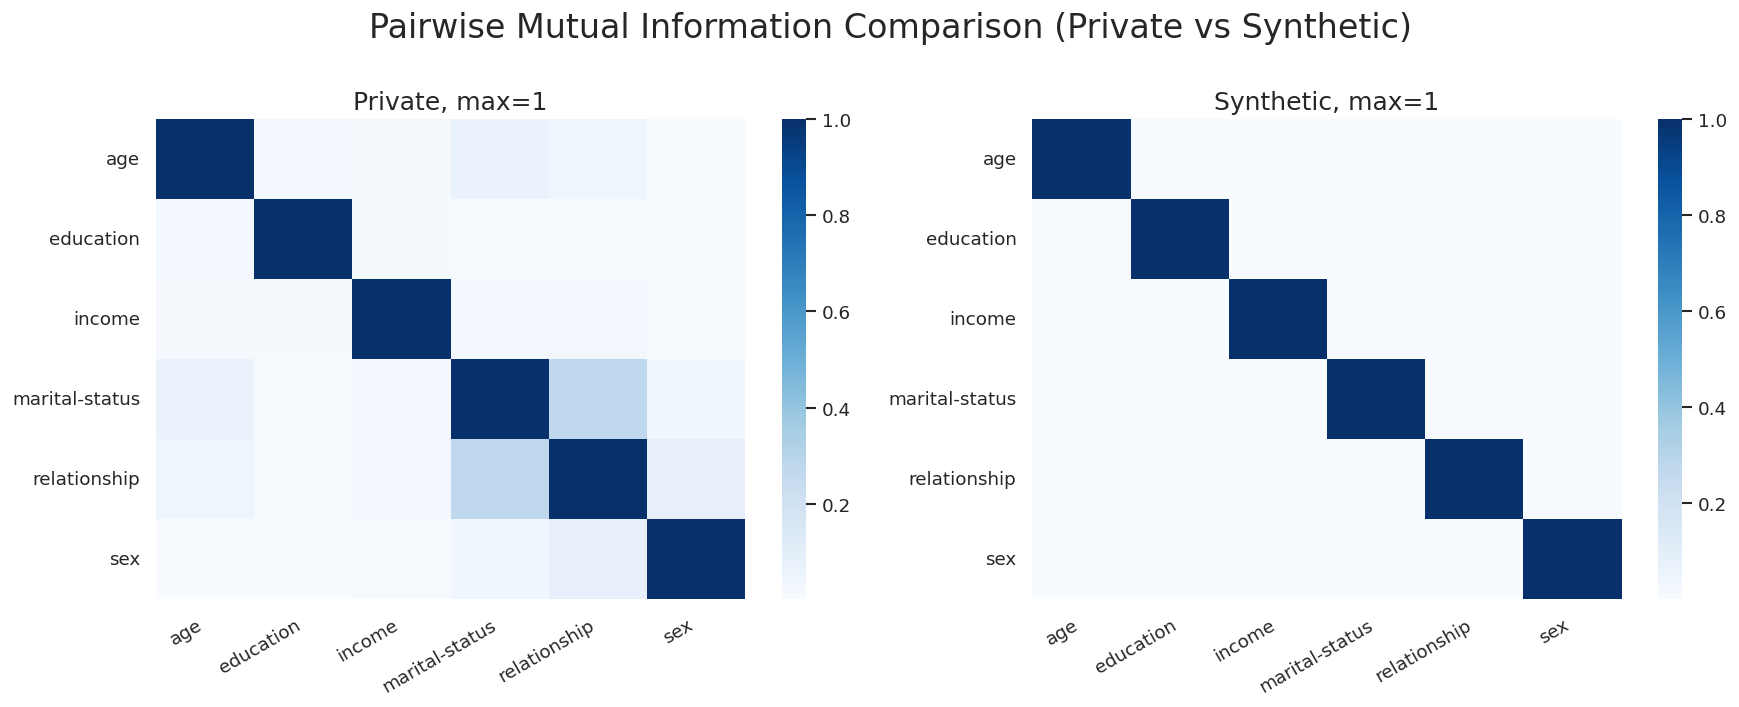

In [20]:
independent_synthesizer.independent_data_describer(categorical_attributes=categorical_attributes,
                                                  candidate_keys=candidate_keys)

independent_synthesizer.generate_synthetic_data()
independent_synthesizer.plot_comparision()

================ Constructing Bayesian Network (BN) ================
Adding ROOT relationship
Adding attribute marital-status
Adding attribute age
Adding attribute sex
Adding attribute education
Adding attribute income
========================== BN constructed ==========================


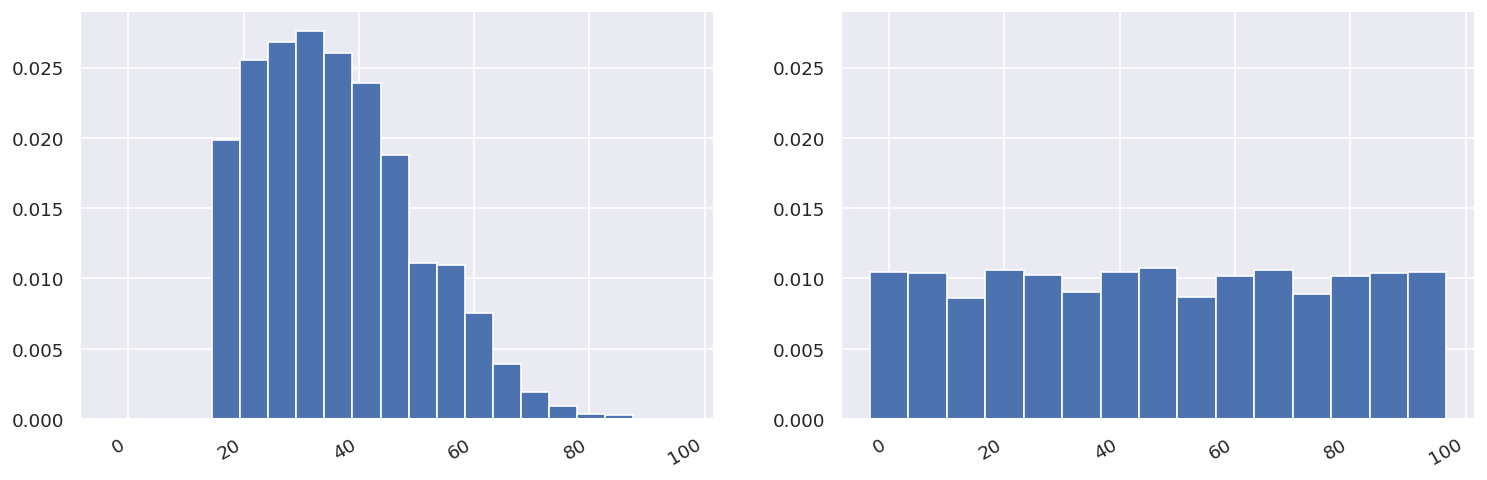

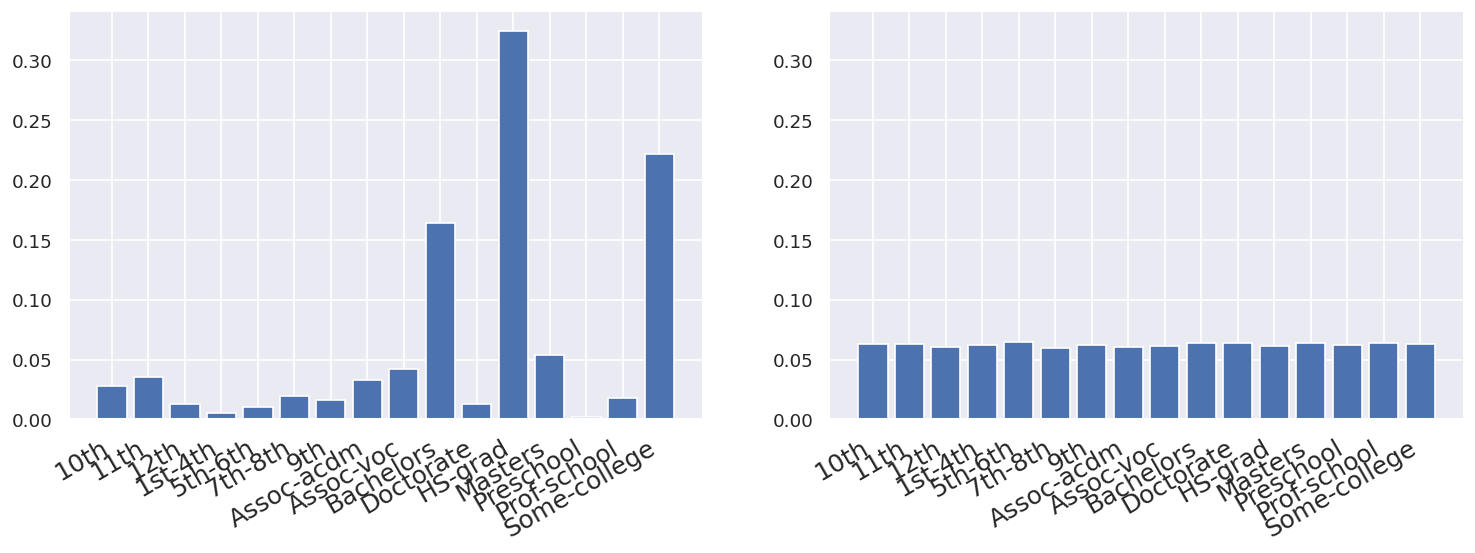

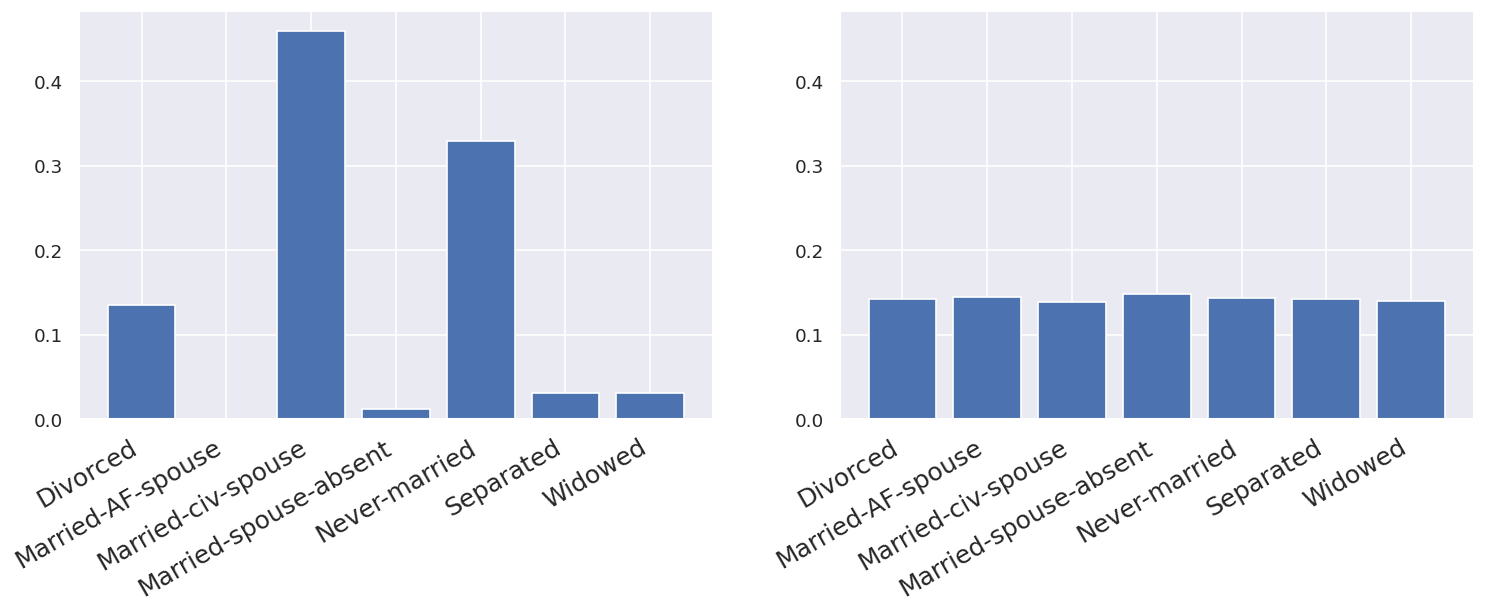

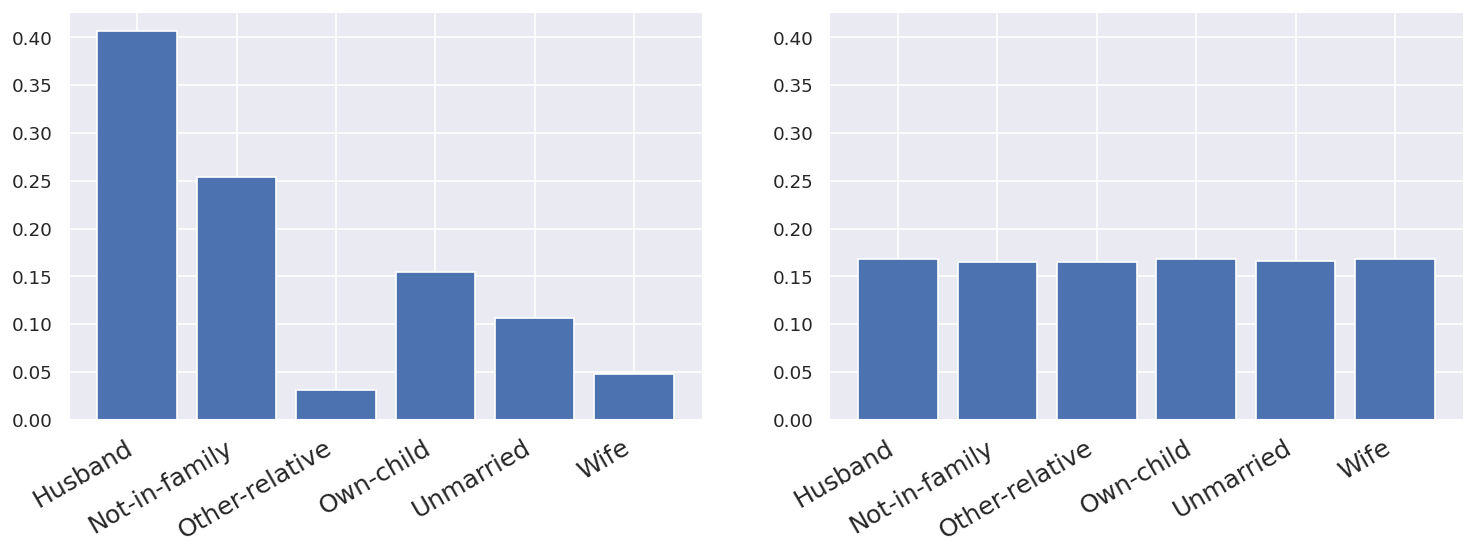

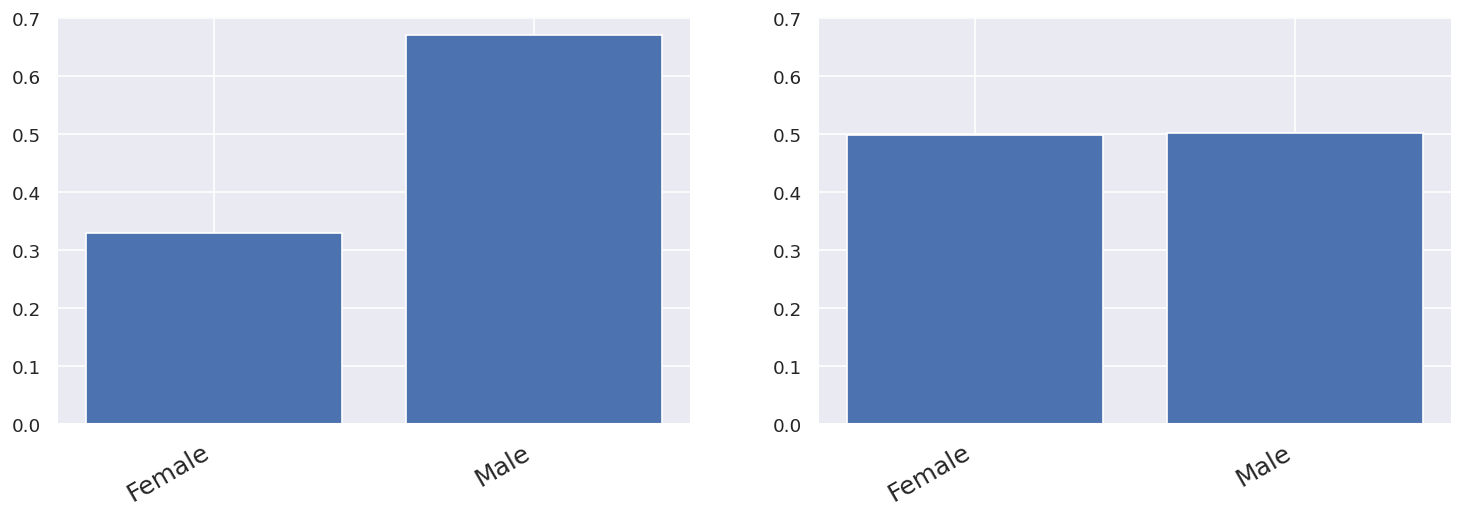

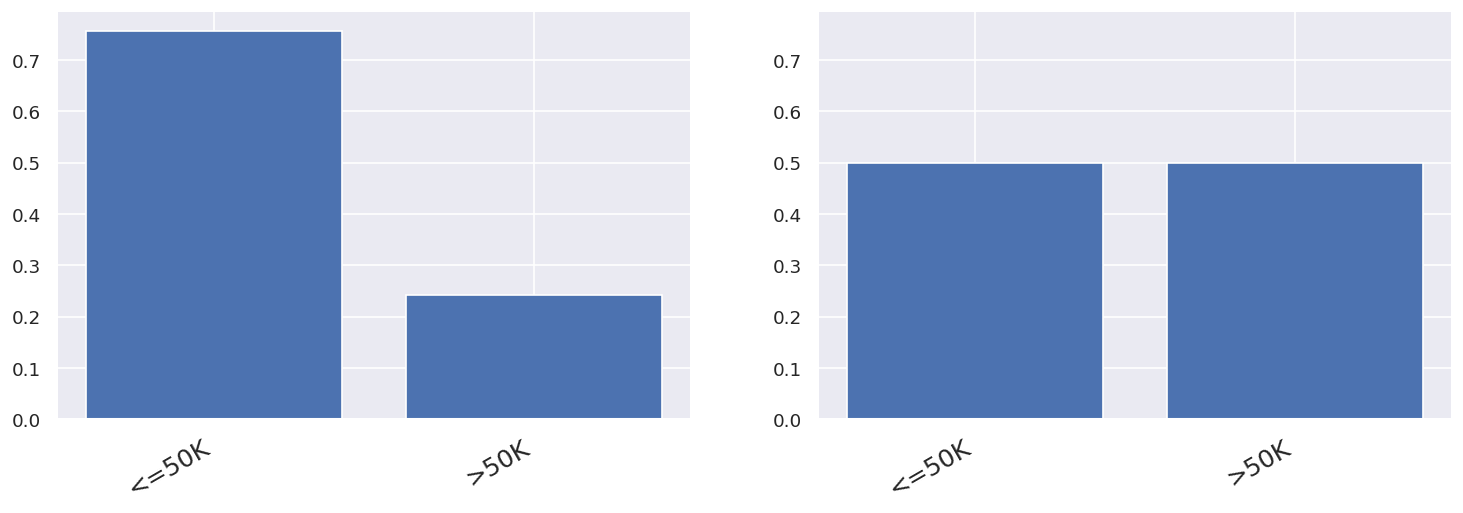

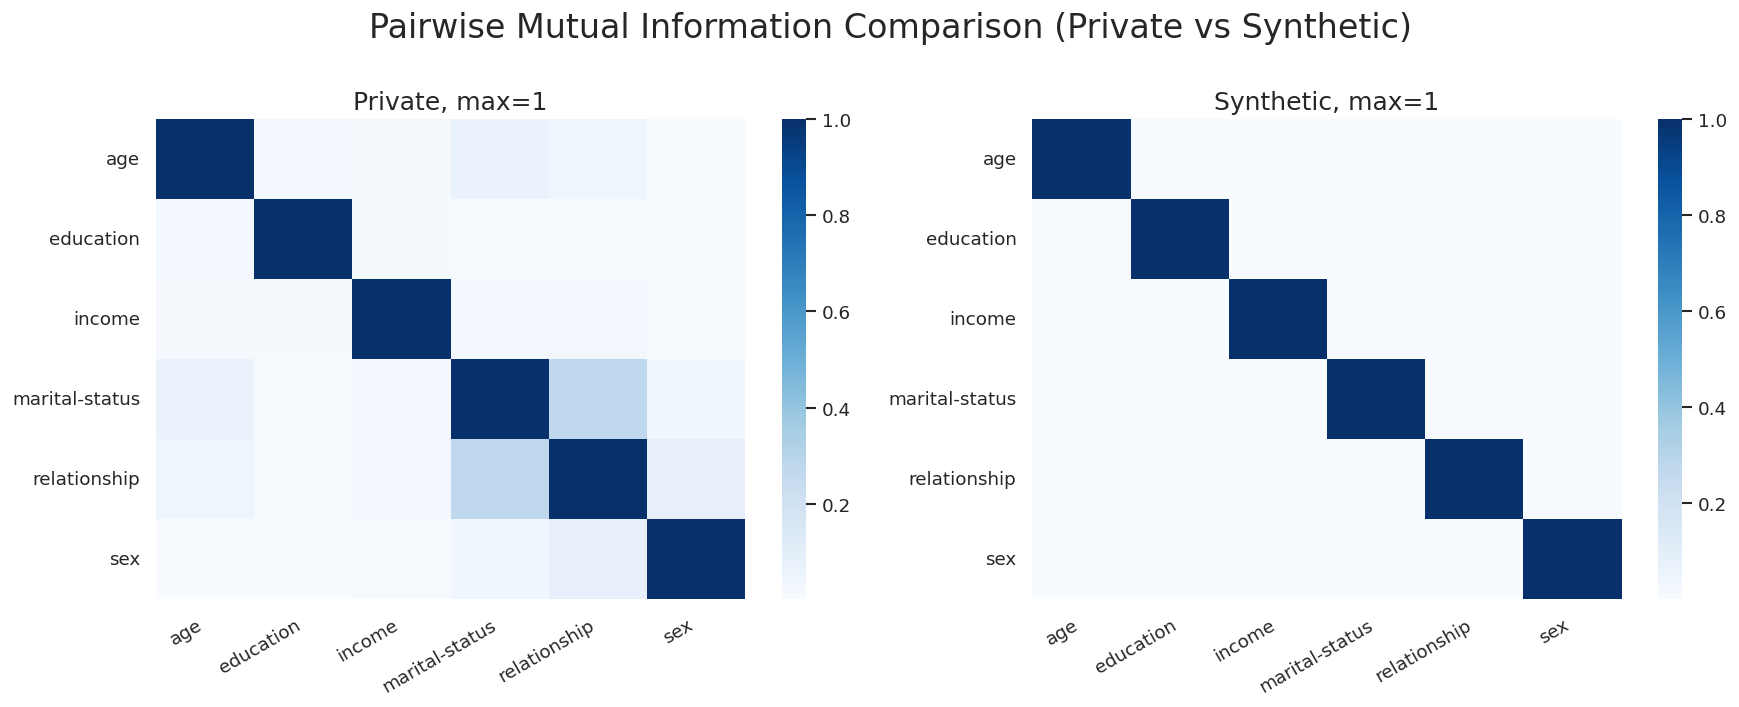

In [21]:
correlated_synthesizer = DataSynthesizer(input_data='/home/jupyter/SyntheticNAV/Data/data/adult_ssn.csv', 
                                 description_file='/home/jupyter/SyntheticNAV/Data/out/correlated_attribute_mode/description.json', 
                                 synthetic_data='/home/jupyter/SyntheticNAV/Data/out/correlated_attribute_mode/sythetic_data.csv', 
                                     mode='correlated_attribute_mode')

categorical_attributes = {'education': True}
candidate_keys = {'ssn': True}
epsilon = 1
degree_of_bayesian_network = 2

correlated_synthesizer.correlated_data_describer(categorical_attributes=categorical_attributes,
                                               candidate_keys=candidate_keys,
                                               epsilon=epsilon,
                                               degree_of_bayesian_network=degree_of_bayesian_network)

correlated_synthesizer.generate_synthetic_data()
correlated_synthesizer.plot_comparision()

In [ ]:


class DataSynthesizer:
    
class Mode:
    
class DataSynthesizer:
    
class Mode:
    








